In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]


In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

catal   = np.genfromtxt('ESN_HI_catal_all.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_catal   = catal['pgc']
R50u_catal  = catal['R50_u']
R50g_catal  = catal['R50_g']
R50r_catal  = catal['R50_r']
R50i_catal  = catal['R50_i']
R50z_catal  = catal['R50_z']
R50w1_catal = catal['R50_w1']
R50w2_catal = catal['R50_w2']
Sba_catal   = catal['Sba']
Wba_catal   = catal['Wba']

pgc_tab = table['pgc']
u_tab   = table['u_sss']
g_tab   = table['g_sss']
r_tab   = table['r_sss']
i_tab   = table['i_sss']
z_tab   = table['z_sss']
w1_tab  = table['w1_sss']
w2_tab  = table['w2_sss']
m21_tab = table['m21']
inc_tab = table['inc']
Sqlt = table['Sqlt']
Wqlt = table['Wqlt']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
Vhel = table['Vhel']
Vls = table['Vls']


N = len(pgc_tab)
inc  = np.zeros(N)
m21  = np.zeros(N)
Sba  = np.zeros(N)
Wba  = np.zeros(N)

uuu  = np.zeros(N)
ggg  = np.zeros(N)
rrr  = np.zeros(N)
iii  = np.zeros(N)
zzz  = np.zeros(N)
w11  = np.zeros(N)
w22  = np.zeros(N)

R50u  = np.zeros(N)
R50g  = np.zeros(N)
R50r  = np.zeros(N)
R50i  = np.zeros(N)
R50z  = np.zeros(N)
R50w1 = np.zeros(N)
R50w2 = np.zeros(N)

SSqlt = np.zeros(N)
WWqlt = np.zeros(N)

for i, idd in enumerate(pgc_tab):
    if idd in pgc_catal:
        indx,   = np.where(pgc_catal==idd)
        R50u[i]  = R50u_catal[indx][0]
        R50g[i]  = R50g_catal[indx][0]
        R50r[i]  = R50r_catal[indx][0]
        R50i[i]  = R50i_catal[indx][0]
        R50z[i]  = R50z_catal[indx][0]
        R50w1[i] = R50w1_catal[indx][0]
        R50w2[i] = R50w2_catal[indx][0]
        Sba[i]   = Sba_catal[indx][0]
        Wba[i]   = Wba_catal[indx][0]

    if idd in pgc_tab:
        indx,  = np.where(pgc_tab==idd)    
        inc[i] = inc_tab[indx][0]
        uuu[i] = u_tab[indx][0]
        ggg[i] = g_tab[indx][0]
        rrr[i] = r_tab[indx][0]
        iii[i] = i_tab[indx][0]
        zzz[i] = z_tab[indx][0]
        w11[i] = w1_tab[indx][0]
        w22[i] = w2_tab[indx][0]
        m21[i] = m21_tab[indx][0]   
        SSqlt[i] = Sqlt[indx][0]   
        WWqlt[i] = Wqlt[indx][0]   
    
    
    
mu50_u  = uuu+2.5*np.log10(2.*np.pi*(R50u*60)**2)-2.5*np.log10(Sba)
mu50_g  = ggg+2.5*np.log10(2.*np.pi*(R50g*60)**2)-2.5*np.log10(Sba)
mu50_r  = rrr+2.5*np.log10(2.*np.pi*(R50r*60)**2)-2.5*np.log10(Sba)
mu50_i  = iii+2.5*np.log10(2.*np.pi*(R50i*60)**2)-2.5*np.log10(Sba)
mu50_z  = zzz+2.5*np.log10(2.*np.pi*(R50z*60)**2)-2.5*np.log10(Sba)
m21_u   = m21 - uuu
m21_g   = m21 - ggg
m21_r   = m21 - rrr
m21_i   = m21 - iii
m21_z   = m21 - zzz


mu50_w1  = w11+2.5*np.log10(2.*np.pi*(R50w1*60)**2)-2.5*np.log10(Wba)
mu50_w2  = w22+2.5*np.log10(2.*np.pi*(R50w2*60)**2)-2.5*np.log10(Wba)
m21_w1   = m21 - w11
m21_w2   = m21 - w22

u_i   = uuu-iii
g_i   = ggg-iii
r_i   = rrr-iii
i_z   = iii-zzz
g_z   = ggg-zzz
i_w1  = iii-w11
i_w2  = iii-w22
r_z   = rrr-zzz
g_r   = ggg-rrr
r_z   = rrr-zzz

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in subtract
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in subtract
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in subtract
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invali

In [106]:
table = np.genfromtxt('DMs_EDD.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod   = table['Vmod']

DM_edd  = table['DMr_TFgz_Cgz']
dDM_edd = table['dDMr_TFgz']


# DM_edd  = table['DMi_Cgi']
# dDM_edd = table['dDMi']


# DM_edd  = table['DMz']
# dDM_edd = table['dDMz']

rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

I = iii-DM_edd
W1 = w11-DM_edd
print len(pgc_edd)

10736


In [107]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


# # table = pd.read_fwf('DMi_V_m17rev.6616.spgc')
# # table = pd.read_fwf('DMW1_V_m161rev.5065.spgc')

# table = pd.read_fwf('DMriz_V_m17.6768.adj.head')

# pgc_b = np.asarray(table['PGC'])
# # Vmod = np.asarray(table['Vmod'])

# pgc_b.shape

# # for i, idd in enumerate(pgc_b):
# #     print i, idd

In [108]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop:
        
        keep[i] = 1
    else:
        p+=1

        
print p

405


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


5048
C[0]*P = -2.88520387140003e-05


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


108.375 76.48494114715838
325.4017857142857 75.86013159804709
565.5999999999999 78.2906871525911
858.3333333333334 75.60223583079099
75.20604461387117
[-1.11174530e-18  1.87625275e+00]


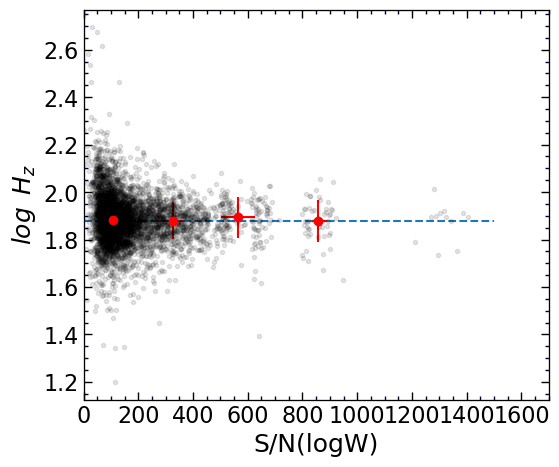

In [109]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>10) & (I<-17) & (zzz>10)  & (rrr>10)
                 & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

X0 = logWimx[indx]
print len(X0)
X  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vmod[indx]
Y  = logH[indx]
ax.set_xlim(0,1700)
# ax.set_ylim(1.2,2.6)

P = X0/X

v = np.linspace(0,1500,50)


c = np.polyfit(P,Y, 1, w=1./Ye**2)

Y  = logH[indx] - (c[0]*P)

print 'C[0]*P =',   c[0]

c = np.polyfit(P,Y, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')
ax.plot(P, Y, 'k.', alpha=0.1)

XL = []
YL = []
YLe = []
for i in np.arange(0,1000,250):
    xp = []
    yp = []
    for ii in range(len(P)):
        xi = P[ii]
        if xi>=i and xi<i+250:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('S/N(logW)', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 



set_axes(ax)
Y  = logH[indx] - (c[0]*P)

print 10**c[1]
print c

C=  [1.07521888 1.85522218]
Median =  1.8776531361806448
0.007 76.5067545113536
0.015 75.87818206812157
0.024 74.91016035776991
0.034 73.58787186938432
0.043 78.6206458664973
0.054 79.58200372766014
0.062 74.65606781240695
0.073 68.44266271566958
75.4489388763389
[8.97403612e-15 1.87765314e+00]


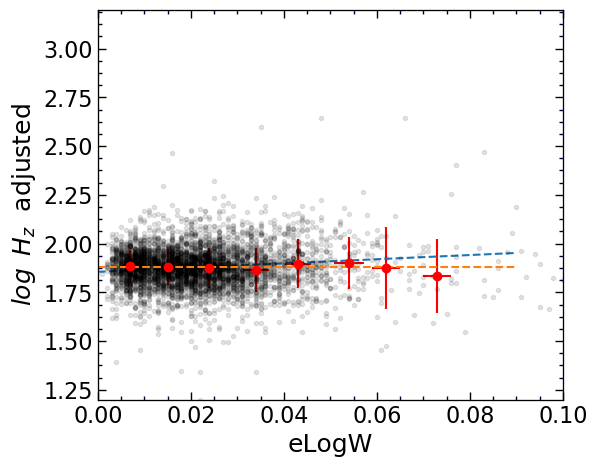

In [110]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>10) & (I<-17) & (zzz>10)  & (rrr>10)
#                  & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

ax.set_xlim(0,0.1)
ax.set_ylim(1.2,3.2)
v = np.linspace(0,0.09,50)

xx = X
yy = Y
c = np.polyfit(xx, yy, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')

# print c
Y  = Y - (c[0]*X+c[1]) + np.median(yy)

print 'C= ', c
print 'Median = ', np.median(yy)


c = np.polyfit(X,Y, 1, w=1./Ye**2)

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v,c[0]*v+c[1], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.01):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.01:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$'+'  adjusted', fontsize=18) 





set_axes(ax)

# x_ax, y_ax = set_axes(ax, (0, 0.1), (45,110), fontsize=12) 

# ax.set_yscale('log')

# from matplotlib.ticker import MultipleLocator

# from matplotlib.ticker import NullFormatter
# ax.yaxis.set_major_formatter(NullFormatter())  
# ax.yaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.yticks([50,60,70,80,90,100,110], ('50','60','70','80','90','100','110'))
# ax.set_yticks(np.arange(50,120, step=10))


print 10**c[1]
print c

In [111]:
# print len(Y)

# X0 = logWimx[indx]
# X  = logWimx_e[indx]
# Ye = 0.2*dDM_edd[indx]
# V  = Vmod[indx]
# Y  = logH[indx]


# plt.plot(V, X0, '.')
# plt.plot(X0/X, Y, '.', alpha=0.2)
# plt.plot(DM_edd[indx], Y, '.', alpha=0.2)

In [112]:
print X

[0.011 0.025 0.025 ... 0.01  0.028 0.031]


2.152 77.14998738707075
2.327 74.55846182607577
2.503 76.68128098256712
2.659 74.70721210455046
2.818 67.70887455365896
[0.00354953 1.86857698]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f437f83b890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f437f7f4a10>)

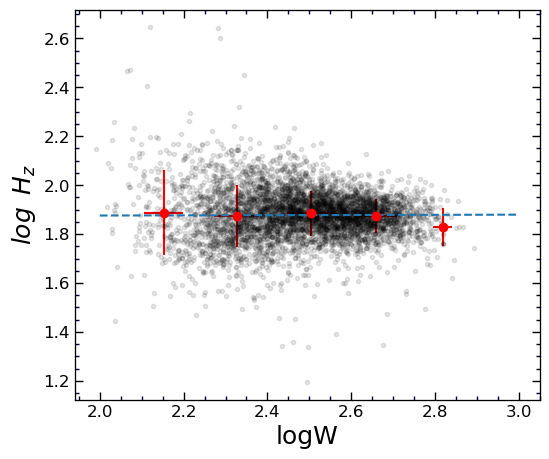

In [113]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2,3,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)


4593.4 74.40220789524388
5419.3 75.06038989340561
6618.1 75.86470840340189
7426.6 76.13503092274729
8481.9 76.12666118311577
9474.6 76.46408789069544
10537.0 74.04687881478041
11488.099999999999 76.55382627985846
12429.0 74.79516982168441
13435.2 73.45365624820593
14395.7 76.30448729751461
15575.349999999999 74.42199802032029
16587.5 82.3957944918776
17348.2 76.73689369298909
75.32729581636667 75.5813921145189


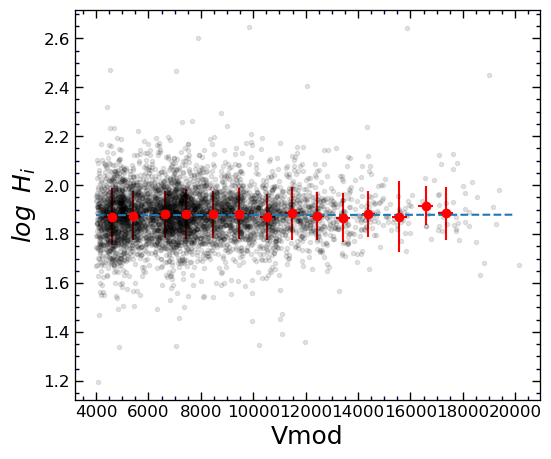

In [114]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (iii>10) & (I<-16) & (zzz>10) 
#                  & (Sqlt>3) & (keep==1))




# X0 = logWimx[indx]
# X  = logWimx_e[indx]
# Ye = 0.2*dDM_edd[indx]
# V  = Vmod[indx]
# Y  = logH[indx]





X = V

ax.plot(X, Y, 'k.', alpha=0.1)


# ix0 = np.where((X0>2.1) & (X0<2.2))
# ax.plot(X[ix0], Y[ix0], 'g.')
# ix0 = np.where(X0>2.8)
# ax.plot(X[ix0], Y[ix0], 'r.')


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')




set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])


108.375 75.19070588387098
325.4017857142857 76.56387256478749
565.5999999999999 78.69489573696006
858.3333333333334 74.55483411418064
75.80994774014962
[-6.19695305e-06  1.87972620e+00]


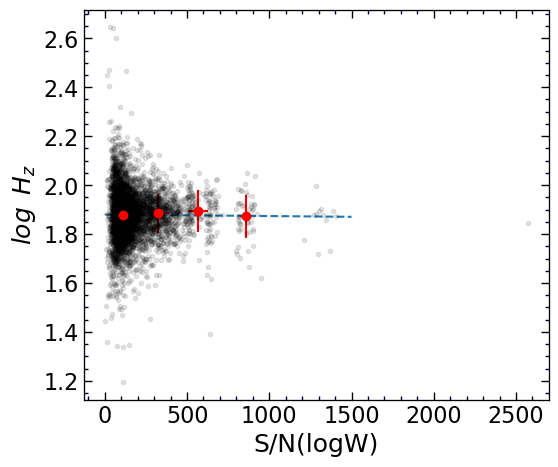

In [115]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



v = np.linspace(0,1500,50)



c = np.polyfit(P,Y, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')
ax.plot(P, Y, 'k.', alpha=0.1)

XL = []
YL = []
YLe = []
for i in np.arange(0,1000,250):
    xp = []
    yp = []
    for ii in range(len(P)):
        xi = P[ii]
        if xi>=i and xi<i+250:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('S/N(logW)', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 



set_axes(ax)
Y  = logH[indx] - (c[0]*P)

print 10**c[1]
print c

In [116]:
len(Y)

5048

In [117]:
len(iii[indx])

5048

-0.030000000000001137 73.92853893328048
0.07000000000000028 77.1181243730777
0.14000000000000057 75.66239546138804
0.22000000000000064 70.75451333111737
0.3200000000000003 70.50053633940958


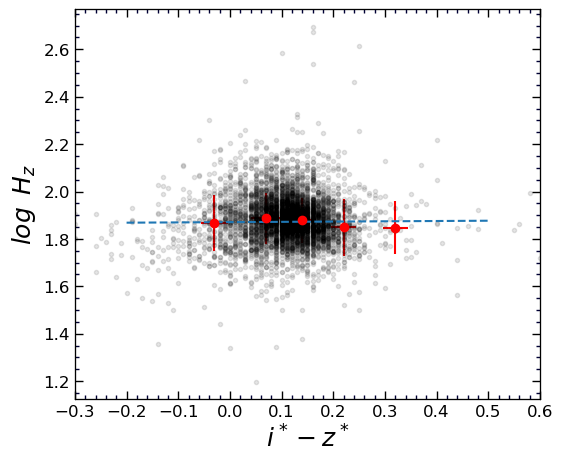

In [118]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = iii[indx]-zzz[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(-0.1,0.4, 0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*-z^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(-0.2,0.5, 50)
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


ax.set_xlim(-0.3, 0.6)

set_axes(ax, fontsize=12)

Y1 = Y - (c[0]*(X)+c[1])+np.log10(73.11)

-0.030000000000001137 72.78011836112152
0.07000000000000028 75.74773417238784
0.14000000000000057 74.19309810529363
0.22000000000000064 69.2501820403565
0.3200000000000003 68.82394745180797


(<matplotlib.axes._subplots.AxesSubplot at 0x7f437e932950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f437e91ffd0>)

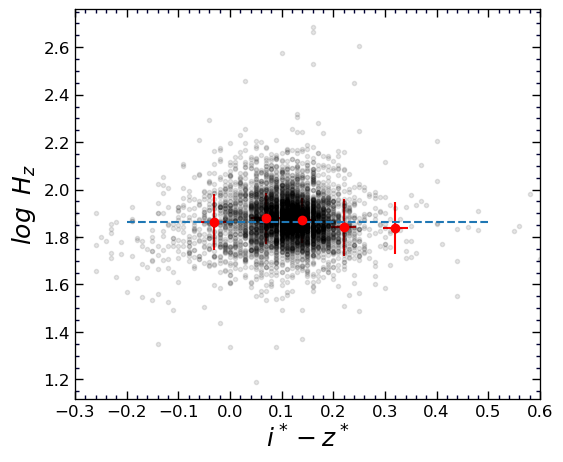

In [119]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = iii[indx]-zzz[indx]

ax.plot(X, Y1, 'k.', alpha=0.1)

for i in np.arange(-0.1,0.4, 0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y1[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*-z^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(-0.2,0.5, 50)
c = np.polyfit(X,Y1, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


ax.set_xlim(-0.3, 0.6)

set_axes(ax, fontsize=12)



4948.3 73.29588457883685
7015.3 74.56869930112724
8913.3 74.65849802128041
10817.0 74.46523472978437
12681.95 73.22406506823846
14616.7 74.07395378300647
17147.85 79.01187425325566


(<matplotlib.axes._subplots.AxesSubplot at 0x7f437e5f1650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f437e62e490>)

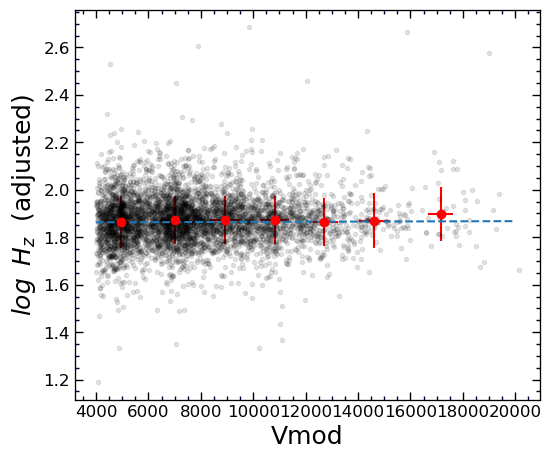

In [120]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = V

ax.plot(X, Y1, 'k.', alpha=0.1)

for i in np.arange(4000,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y1[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$'+'  (adjusted)', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X,Y1, 1, w=1/Ye)
ax.plot(v,c[0]*v+c[1], '--')




set_axes(ax, fontsize=12)

